## Calculation of Critical Values


### (1) Gaussian Distribution

In [1]:
from scipy.stats import norm
p = 0.95
value = norm.ppf(p)
print(value)
p = norm.cdf(value)
print(p)

1.6448536269514722
0.95


### (2) Student's t Distribution

In [2]:
from scipy.stats import t
p = 0.95
dof = 10
value = t.ppf(p,dof)
print(value)
p = t.cdf(value,dof)
print(p)

1.8124611228107335
0.949999999999923


### (3) Chi-Squared Distribution

In [3]:
from scipy.stats import chi2 
p = 0.95
dof = 10
value = chi2.ppf(p,dof)
print(value)
p = chi2.cdf(value,dof)
print(p)

18.307038053275146
0.95


# Chapter - 12

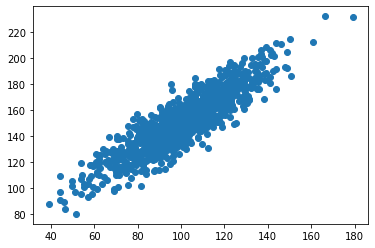

Data1 mean and std: 100.77624952319204 19.620082678644234
Data1 mean and std: 151.0495039571378 22.35798918770594


In [78]:
from numpy import random, std, mean, cov 
from numpy.random import seed, randn
from matplotlib import pyplot
seed(1)
data1 = 20*randn(1000) + 100
data2 = data1 + (10*randn(1000) + 50)
pyplot.scatter(data1,data2)
pyplot.show()
print('Data1 mean and std:', mean(data1),std(data1))
print('Data1 mean and std:', mean(data2),std(data2))

As we can see, there is a positive correlation between these two variables

In [5]:
from numpy import cov
covariance = cov(data1,data2)
print(covariance)

[[385.33297729 389.7545618 ]
 [389.7545618  500.38006058]]


### Q. How to import a dataset and find correlation between all the pairs of real-valued variables?

In [6]:
import pandas as pd 
from scipy.stats import pearsonr
data = pd.read_csv('/Users/aniketgoyal/Documents/jupyter_notebook/HDSC Code/Module 2/Questions/iris.csv')
data.corr(method = 'pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


# Chapter 13

### Creating dataset

In [7]:
from numpy.random import seed, randn
from numpy import mean, std
seed(1)
data1 = 5*randn(100) + 50
data2 = 5*randn(100) + 51
print(mean(data1),std(data1))
print(mean(data2),std(data2))

50.30291426037849 4.4257810691579245
51.763973888101 4.6599740872749775


Now, we will compare the two dataset using the t-test

### (1) Student's t test

In [8]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(data1,data2)
alpha = 0.05
if p > alpha:
    print("Same Distributions (fail to reject HO)")
else:
    print("different distribution(reject HO)")
print(p,stat)

different distribution(reject HO)
0.024782819014639627 -2.2620139704259556


### (2) Paired student's t test
Although the samples are independent, not paired, we can pretend for the sake of the demonstration that the observations are paired and calculate the statistic

In [9]:
from numpy.random import seed, randn
from scipy.stats import ttest_rel
seed(1)
data1 = 5*randn(100)+50
data2 = 5*randn(100)+51
stat, p = ttest_rel(data1,data2)
print("Statistics:",stat,",P-Value:",p)
alpha = 0.05
if p>alpha :
    print("Same distributions (Fail to reject HO)")
else:
    print("different distributions (Reject HO)")

Statistics: -2.3719009567078646 ,P-Value: 0.019630798337126193
different distributions (Reject HO)


### (3) Analysis of Variance test (ANOVA)
This test is used to test if TWO OR MORE data samples are having same mean, Hence are taken from the same data population. 
The null hypo is that all the distributions have same mean

In [10]:
from scipy.stats import f_oneway
from numpy.random import randn,seed
seed(1)
data1 = 5*randn(100) + 50
data2 = 5*randn(100) + 50
data3 = 5*randn(100) + 52
stat, f = f_oneway(data1, data2, data3)
alpha = 0.05
print(f)
if f>alpha:
    print("Fail to reject HO(Same distributions)")
else:
    print("Reject HO(different distributions)")

0.027043909170728936
Reject HO(different distributions)


# Chapter 14

## Association effect size
One of the most used method is the pearson's r correlation.

In [11]:
from numpy.random import randn, seed
from scipy.stats import pearsonr
seed(1)
data1 = 10 * randn(10000) + 50
data2 = data1 + (10 * randn(10000) + 50)
corr,_ = pearsonr(data1,data2)
print("%.3f"%corr)

0.712


## Difference effect size
The most used method is cohen's d method and we will also use the same

In [12]:
from numpy.random import seed, randn

def cohend(d1,d2):
    from numpy import var,mean
    from math import sqrt
    n1,n2 = len(d1),len(d2)
    s1,s2 = var(d1,ddof=1),var(d2,ddof=1)
    s = sqrt(((n1-1)*s1 + (n2-1)*s2)/(n1+n2-2))
    u1,u2 = mean(d1),mean(d2)
    return (u1-u2)/s

seed(1)
d1 = 10*randn(10000) + 60
d2 = 10*randn(10000) + 55
cohend(d1,d2)

0.5003180892428785

# Chapter - 15

In [13]:
from statsmodels.stats.power import TTestIndPower
# Pre-Defined parameters for power analysis
alpha = 0.05
effect = 0.8
power = 0.8
analysis = TTestIndPower()
result = analysis.solve_power(effect,alpha = alpha, power = power, nobs1 = None)
result
# This means our sample size is 26.

25.52457250047935

This is the code to create power curves:

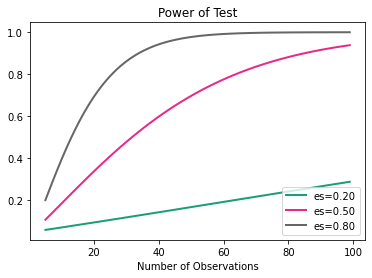

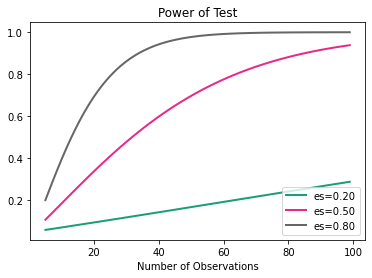

In [14]:
from matplotlib import pyplot
import numpy as np
from statsmodels.stats.power import TTestIndPower
effect_size = np.array([0.2,0.5,0.8])
sample_size = np.array(range(5,100))
graph = TTestIndPower()
graph.plot_power(dep_var='nobs',nobs=sample_size, effect_size=effect_size)

# Chapter 17

In [15]:
from sklearn.utils import resample
data = [1,2,3,4,5,6]
boot = resample(data,replace=True, n_samples=4, random_state=1)
print(boot)
oob = [x for x in data if x not in boot]
oob

[6, 4, 5, 1]


[2, 3]

# Chapter 18

In [16]:
from sklearn.model_selection import KFold
import numpy as np
# prepare cross validation
kfold = KFold(3,True,1)
data = np.array([123,15,135,13,15,175])
# enumerate splits
for train,test in kfold.split(data):
    print(data[train],data[test]) 
# Here we include train and test in data[], because they are just indices.

[123  13  15 175] [ 15 135]
[ 15 135  13 175] [123  15]
[123  15 135  15] [ 13 175]


/Users/aniketgoyal/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


# Chapter 20

The following code is for gaussian distribution with 100 samples:

In [41]:
from numpy.random import randn, seed
from numpy import sqrt
from scipy.stats import norm, chi2
seed(1)
data = 5*randn(100) + 50
n = len(data)
dof = n-1

# Specifying the data coverage for Normal Distribution.
prop = 0.95
prop_inv = (1.0-prop)/2
Gaussian_Critical = norm.ppf(prop_inv)

# Specifying the Confidence.
from scipy.stats import chi2
prob = 0.99
prob_inv = (1-prob)
Chi_Critical = chi2.ppf(prob_inv, dof)

Interval = sqrt((dof * (1+(1/n)) * Gaussian_Critical**2)/Chi_Critical)

data_mean = mean(data)
data_mean
lower, upper = data_mean - Interval, data_mean + Interval
print(f'The values from {lower} to {upper} ')

The values from 47.947433543234624 to 52.65839497752236 


Now let us illustrate that size of confidence interval will decrease with the increase in the number of sample:

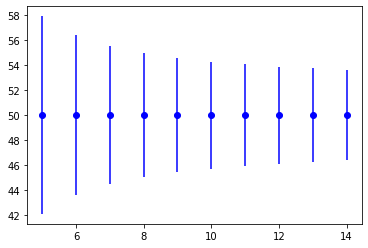

In [55]:
from numpy.random import seed, randn 
from numpy import sqrt
from scipy.stats import norm, chi2
from matplotlib import pyplot

size = range(5,15)
for n in size:
    data = 5*randn(n) + 50
    dof = n-1
    prop = 0.95
    prop_inv = (1.0-prop)/2
    Gaussian_Critical = norm.ppf(prop_inv)
    prop = 0.99
    prop_inv = 1.0-prop
    Chi_Critical = chi2.ppf(prop_inv, dof)
    Tol = sqrt((dof * (1+(1/n)) * Gaussian_Critical**2)/Chi_Critical)
    pyplot.errorbar(n, 50, yerr=Tol, color = 'Blue', fmt = 'o')
pyplot.show()

As we can see, the tolerance interval becomes smaller, As we increase the no. of samples.

# Chapter 21

In [9]:
from math import sqrt
Interval = 1.96 * sqrt((0.8 * (1-0.8))/1000000)
Interval

0.0007839999999999999

In [12]:
from statsmodels.stats.proportion import proportion_confint
lower, upper = proportion_confint(88, 100, 0.05)

In [23]:
# bootstrap confidence intervals
from numpy.random import seed, randn, randint
from numpy import mean
from numpy import median
from numpy import percentile
seed(1)

# generate dataset
dataset = 0.5 + randn(1000) * 0.5

# bootstrap
scores = list()
for _ in range(100):
    indices = randint(0, 1000, 1000) 
    sample = dataset[indices]
    statistic = mean(sample) 
    scores.append(statistic)
print('50th percentile (median) = %.3f' % median(scores)) 

# calculate 95% confidence intervals (100 - alpha)
alpha = 5.0
lower_p = alpha / 2.0
lower = max(0.0, percentile(scores, lower_p)) 
print('%.1fth percentile = %.3f' % (lower_p, lower))
upper_p = (100 - alpha) + (alpha / 2.0)
upper = min(1.0, percentile(scores, upper_p)) 
print('%.1fth percentile = %.3f' % (upper_p, upper))

50th percentile (median) = 0.523
2.5th percentile = 0.493
97.5th percentile = 0.546


# Chapter 22